Data from Our World in Data, https://github.com/owid/covid-19-data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

sns.set_theme(style="darkgrid")
%config Completer.use_jedi = False # otherwise autocomplete doesn't work on Mac

In [2]:
vaccine_file = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.json"
vaccination_data_df = pd.read_json(vaccine_file)

In [3]:
def get_first_dose(data_df, country, population):
    data = data_df.query("country == @country").data
    df = pd.DataFrame(data.array[0])
    df['people_vaccinated'] = df['people_vaccinated'].fillna(df['total_vaccinations']) # before there were 2nd doses
    df = df[["date", "people_vaccinated"]]
    df[country] = df.people_vaccinated / population * 100
    df["datetime"] = pd.to_datetime(df.date)
    df = df.set_index("datetime")
    return df[[country]]

In [4]:
df_ca = get_first_dose(vaccination_data_df, "Canada", 37590000)
df_us = get_first_dose(vaccination_data_df, "United States", 328200000)
df_uk = get_first_dose(vaccination_data_df, "United Kingdom", 66650000)
df_is = get_first_dose(vaccination_data_df, "Israel", 9053000)

In [12]:
df = df_is.join(df_uk, how="outer").join(df_us, how="outer").join(df_ca, how="outer")
df = df.head(30)

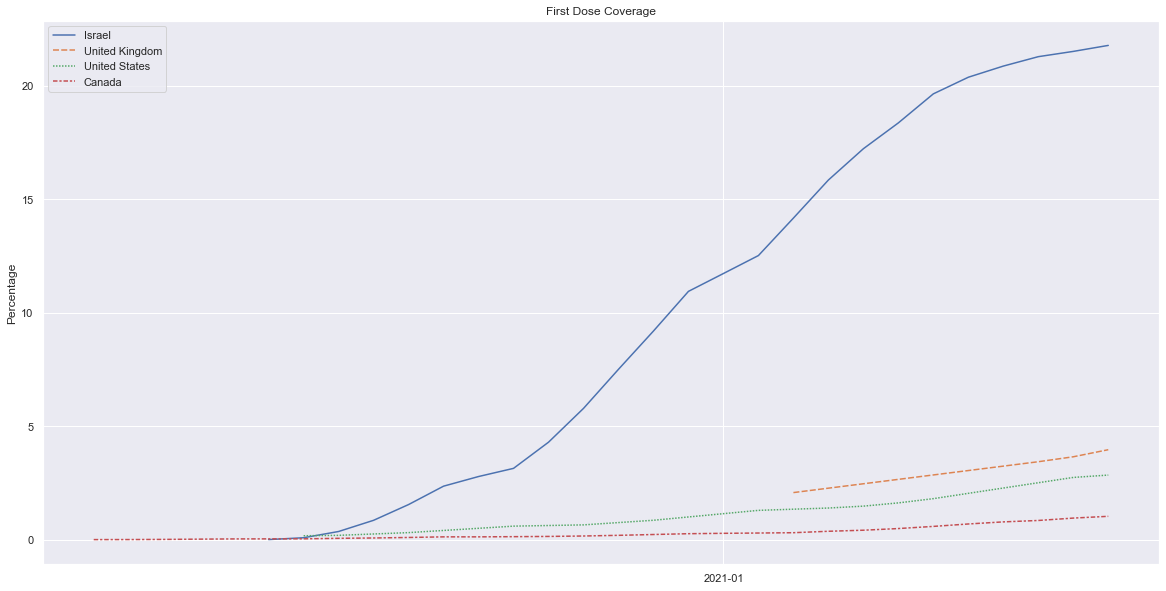

In [13]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data=df)

ax.set(xlabel='', ylabel='Percentage')
ax.xaxis.set_major_locator(md.MonthLocator())
ax.legend()

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("First Dose Coverage")
plt.show()

In [14]:
df.to_json("dose_stats.json")

In [9]:
df.head(20)

,Israel,United Kingdom,United States,Canada
datetime,,,,
2020-12-14,NaN,NaN,NaN,0.000013
2020-12-15,NaN,NaN,NaN,0.001923
2020-12-16,NaN,NaN,NaN,0.008042
2020-12-17,NaN,NaN,NaN,0.019159
2020-12-18,NaN,NaN,NaN,0.029726
2020-12-19,0.000674,NaN,NaN,0.031641
2020-12-20,0.081962,NaN,0.169472,0.033887
2020-12-21,0.356821,NaN,0.187117,0.055509
2020-12-22,0.849674,NaN,NaN,0.070771
